In [1]:
print("Lecture-27")

Lecture-27


## ÇİFT YÖNLÜ LSTM KATMANI

LSTM katmanı biraz daha iyileştirilebilir mi? Bağlamsal olarak gelecek geçmiş ile ilişkili olabilir? Yani bizim gelecek verilerden elde ettiğimiz bilgiler geçmişi yorumlamada kullanılabilir mi? Gelecek bilginin geçmişteki verlierin alaşılmasını kolaylaştırması metinsel uygulamalarda anlaşılabilkir bir durumdur. Örneğin kişi yorumunda önce birisinin bir yere gittiğini söylüyor olabilir.  Daha sonra bu yerin ecxzane olduğu anlaşılıyor olabilir. Bu durumda geçmişte o yerin eczane olduğu bilinse de belki de metin daha iyi anlaşılacaktır. Bazı dillerin gramer yapısı bu durumu daha belirgin hale getirmektedir.

Bidirectional sınıfı.

model.add(Bidirectional(LSTM(64, name='LSTM'), name = 'Bidirectional')

In [2]:
from tensorflow.keras.datasets import imdb

VOCAB_SIZE = 30000
TEXT_SIZE = 300

(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = imdb.load_data(num_words=VOCAB_SIZE)

word_dict = imdb.get_word_index()

from tensorflow.keras.preprocessing.sequence import pad_sequences

training_dataset_x = pad_sequences(training_dataset_x, TEXT_SIZE, padding = 'post')
test_dataset_x = pad_sequences(test_dataset_x, TEXT_SIZE, padding = 'post')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Bidirectional, LSTM, Dropout

model = Sequential(name = 'IMDB-LSTM')
model.add(Embedding(VOCAB_SIZE, 64, input_length = TEXT_SIZE, name='Embedding'))
model.add(Bidirectional(LSTM(64, activation = 'tanh', name = 'LSTM'), name = 'Bidirectional'))
model.add(Dropout(0.5, name = 'Dropout-1'))
model.add(Dense(128, activation='relu', name = 'Dense'))
model.add(Dropout(0.5, name = 'Dropout-2'))
model.add(Dense(1, activation='sigmoid', name='Output'))

model.summary()

Model: "IMDB-LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding (Embedding)       (None, 300, 64)           1920000   
                                                                 
 Bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 Dropout-1 (Dropout)         (None, 128)               0         
                                                                 
 Dense (Dense)               (None, 128)               16512     
                                                                 
 Dropout-2 (Dropout)         (None, 128)               0         
                                                                 
 Output (Dense)              (None, 1)                 129       
                                                         

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

esc = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True, verbose = 1)
hist = model.fit(training_dataset_x, training_dataset_y, epochs=20, batch_size=32, validation_split=0.2, callbacks=[esc])

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - binary_accuracy: 0.5720 - loss: 0.6556 - val_binary_accuracy: 0.7366 - val_loss: 0.5271
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - binary_accuracy: 0.8505 - loss: 0.3869 - val_binary_accuracy: 0.8448 - val_loss: 0.3689
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - binary_accuracy: 0.8866 - loss: 0.3114 - val_binary_accuracy: 0.8222 - val_loss: 0.4815
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - binary_accuracy: 0.9146 - loss: 0.2371 - val_binary_accuracy: 0.8414 - val_loss: 0.3695
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - binary_accuracy: 0.9315 - loss: 0.2027 - val_binary_accuracy: 0.7986 - val_loss: 0.4606
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - binary_accuracy: 0.9419 - loss: 0.1774 - val_binary_accuracy: 0.8806 - val_loss: 0.3495
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - binary_accuracy: 0.9497 - loss: 0.1523 - val_binary_accuracy: 0.8840 - val_loss:

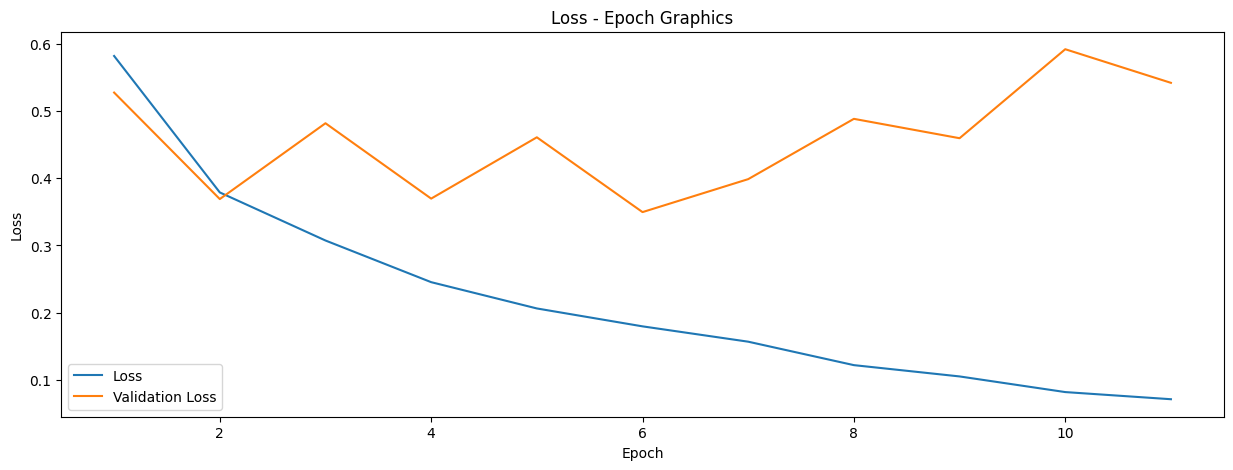

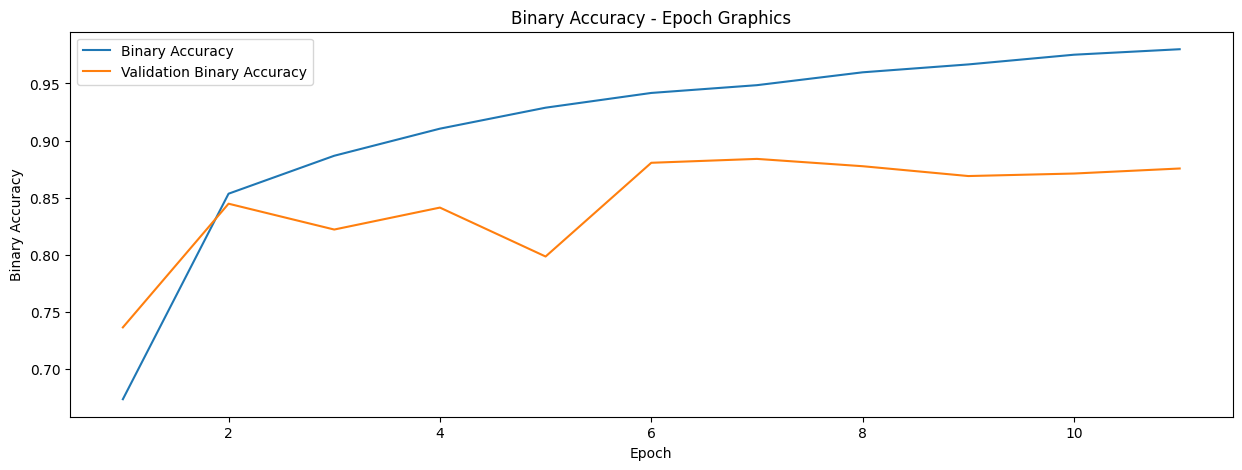

In [ ]:
import matplotlib.pyplot as plt

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()


figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Binary Accuracy - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Binary Accuracy')
plt.plot(range(1, len(hist.history['binary_accuracy']) + 1), hist.history['binary_accuracy'])
plt.plot(range(1, len(hist.history['val_binary_accuracy']) + 1), hist.history['val_binary_accuracy'])
plt.legend(['Binary Accuracy', 'Validation Binary Accuracy'])
plt.show()

In [ ]:
eval_result = model.evaluate(test_dataset_x, test_dataset_y)
for i in range(len(eval_result)):
 print(f'{model.metrics_names[i]} --> {eval_result[i]}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - binary_accuracy: 0.8696 - loss: 0.3614
loss --> 0.36313024163246155
compile_metrics --> 0.8690400123596191


## Geri Beslemeli Ağlar İçin GRU Katmanı

GRU (Gated Recurrent Unit) yöntemi LSTM'ye bir alternatif oluşturmaktadır. GRU yöntemi de tıpkı LSTM yönteminde olduğu gibi ağa uzun dönem hafıza kazandırmaya çalışmaktadır. GREU yöntemi LSTM'ye göre daha az karmaşık olduğu için toplamdan LSTM'ye göre daha az eğitilebilir parametreye sahip olmaktadır. Dolayısıyla GRU yönteminde LSTM'ye göre hem eğitim süresi daha kısadır hem de bu yöntemde daha az bellek kullanılmaktadır. Ancak genel olarak GRU katmanı LSTM'ye göre daha düşük performans göstermektedir. Bu nedenle pek çok uyuglamada ilk tercih edilecek töntem LSTM'dir. Eğer donanımsal bir kısıt söz konusuysa (örneğin düşük güçlü CPU ve az miktarda bellek) LSTM yerine GRU katmanı seçilebilir. Katmanın genel kullanımı LSTM'de olduğu gibidir. Tabii GRU katmanı için genel performans LSTM'den kötü olabiliyorsa da SimpleRNN'den oldukça iyidir.

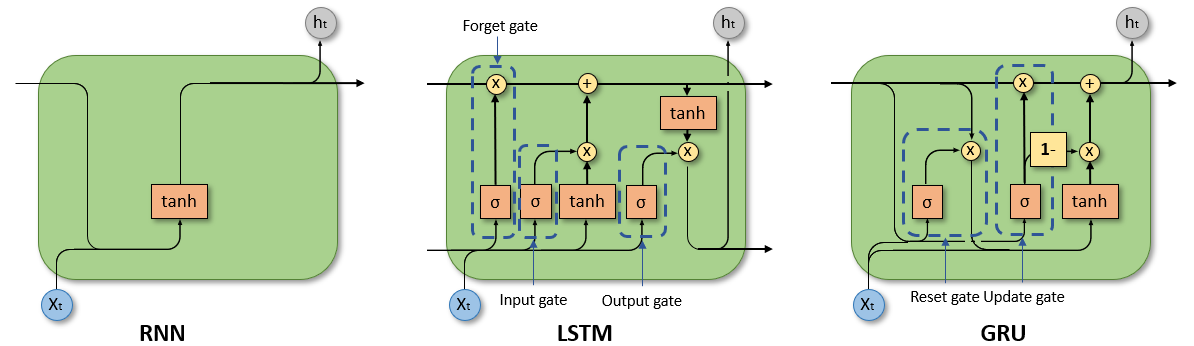

In [3]:
from tensorflow.keras.datasets import imdb

VOCAB_SIZE = 30000
TEXT_SIZE = 300

(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = imdb.load_data(num_words=VOCAB_SIZE)

word_dict = imdb.get_word_index()

from tensorflow.keras.preprocessing.sequence import pad_sequences

training_dataset_x = pad_sequences(training_dataset_x, TEXT_SIZE, padding = 'post')
test_dataset_x = pad_sequences(test_dataset_x, TEXT_SIZE, padding = 'post')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, GRU, Dropout

model = Sequential(name = 'IMDB-GRU')
model.add(Embedding(VOCAB_SIZE, 64, input_length = TEXT_SIZE, name='Embedding'))
model.add(GRU(64, activation = 'tanh', name = 'GRU'))
model.add(Dropout(0.5, name = 'Dropout-1'))
model.add(Dense(128, activation='relu', name = 'Dense'))
model.add(Dropout(0.5, name = 'Dropout-2'))
model.add(Dense(1, activation='sigmoid', name='Output'))

model.summary()

Model: "IMDB-GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding (Embedding)       (None, 300, 64)           1920000   
                                                                 
 GRU (GRU)                   (None, 64)                24960     
                                                                 
 Dropout-1 (Dropout)         (None, 64)                0         
                                                                 
 Dense (Dense)               (None, 128)               8320      
                                                                 
 Dropout-2 (Dropout)         (None, 128)               0         
                                                                 
 Output (Dense)              (None, 1)                 129       
                                                                 
Total params: 1,953,409
Trainable params: 1,953,409
Non-tr

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

esc = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True, verbose = 1)
hist = model.fit(training_dataset_x, training_dataset_y, epochs=20, batch_size=32, validation_split=0.2, callbacks=[esc])

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - binary_accuracy: 0.5005 - loss: 0.6939 - val_binary_accuracy: 0.5094 - val_loss: 0.6942
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - binary_accuracy: 0.5250 - loss: 0.6861 - val_binary_accuracy: 0.5520 - val_loss: 0.6683
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - binary_accuracy: 0.5658 - loss: 0.6552 - val_binary_accuracy: 0.5610 - val_loss: 0.6504
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - binary_accuracy: 0.5847 - loss: 0.6273 - val_binary_accuracy: 0.5666 - val_loss: 0.6446
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - binary_accuracy: 0.5885 - loss: 0.6249 - val_binary_accuracy: 0.5596 - val_loss: 0.6639
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - binary_accuracy: 0.5967 - loss: 0.6030 - val_binary_accuracy: 0.7446 - val_loss: 0.6739
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - binary_accuracy: 0.7679 - loss: 0.4667 - val_binary_accuracy: 0.8684 - val_loss: 0.313

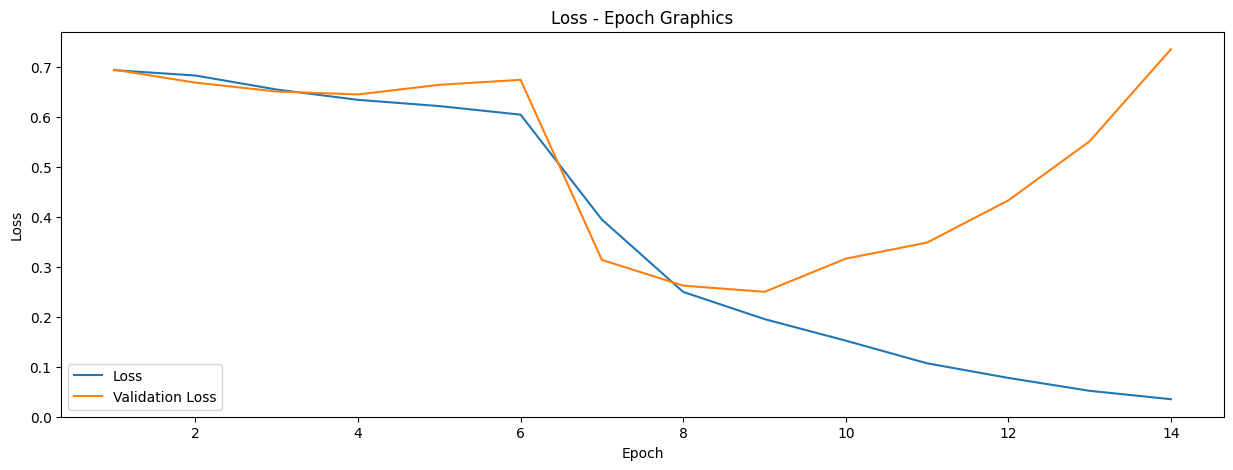

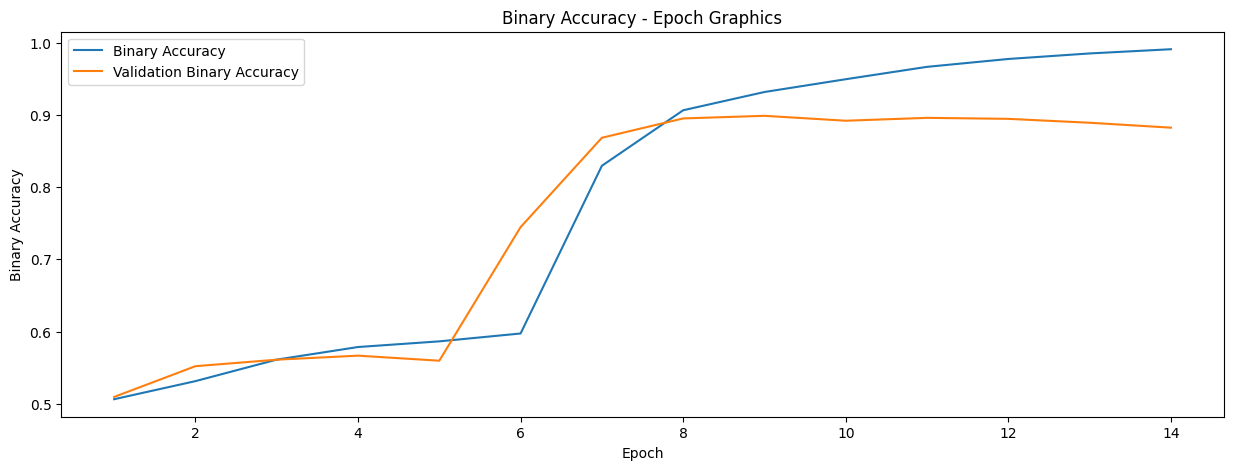

In [ ]:
import matplotlib.pyplot as plt

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()


figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Binary Accuracy - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Binary Accuracy')
plt.plot(range(1, len(hist.history['binary_accuracy']) + 1), hist.history['binary_accuracy'])
plt.plot(range(1, len(hist.history['val_binary_accuracy']) + 1), hist.history['val_binary_accuracy'])
plt.legend(['Binary Accuracy', 'Validation Binary Accuracy'])
plt.show()

In [ ]:
eval_result = model.evaluate(test_dataset_x, test_dataset_y)
for i in range(len(eval_result)):
 print(f'{model.metrics_names[i]} --> {eval_result[i]}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - binary_accuracy: 0.8930 - loss: 0.2606
loss --> 0.2600863575935364
compile_metrics --> 0.893559992313385


Görüldüğü gibi IMDB verisi için GRU katmanı LSTM ve iki yönlü LSTM'yte göre daha iyi bir performans göstermiştir. Ancak bu durumu genellemek yanlıştır.

Keras'taki Bidirectional katmanı bir dekoratör biçiminde oluşturuluyor. Böylece biz herhangi bir geri beslemeli katmanı çift yönlü hale getirebiliriz. GRU katmanını çift yönlü hale getirebiliriz.

In [4]:
training_dataset_x = pad_sequences(training_dataset_x, TEXT_SIZE, padding = 'post')
test_dataset_x = pad_sequences(test_dataset_x, TEXT_SIZE, padding = 'post')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, GRU, Bidirectional,Dropout

model = Sequential(name = 'IMDB-GRU')
model.add(Embedding(VOCAB_SIZE, 64, input_length = TEXT_SIZE, name='Embedding'))
model.add(Bidirectional(GRU(64, activation = 'tanh', name = 'GRU'), name = 'Bidirectional'))
model.add(Dropout(0.5, name = 'Dropout-1'))
model.add(Dense(128, activation='relu', name = 'Dense'))
model.add(Dropout(0.5, name = 'Dropout-2'))
model.add(Dense(1, activation='sigmoid', name='Output'))

model.summary()

Model: "IMDB-GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding (Embedding)       (None, 300, 64)           1920000   
                                                                 
 Bidirectional (Bidirectiona  (None, 128)              49920     
 l)                                                              
                                                                 
 Dropout-1 (Dropout)         (None, 128)               0         
                                                                 
 Dense (Dense)               (None, 128)               16512     
                                                                 
 Dropout-2 (Dropout)         (None, 128)               0         
                                                                 
 Output (Dense)              (None, 1)                 129       
                                                          

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

esc = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True, verbose = 1)
hist = model.fit(training_dataset_x, training_dataset_y, epochs=20, batch_size=32, validation_split=0.2, callbacks=[esc])

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - binary_accuracy: 0.5264 - loss: 0.6845 - val_binary_accuracy: 0.8056 - val_loss: 0.4377
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - binary_accuracy: 0.8129 - loss: 0.4504 - val_binary_accuracy: 0.8514 - val_loss: 0.3531
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - binary_accuracy: 0.8837 - loss: 0.3175 - val_binary_accuracy: 0.8572 - val_loss: 0.3365
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - binary_accuracy: 0.9122 - loss: 0.2407 - val_binary_accuracy: 0.8724 - val_loss: 0.3182
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - binary_accuracy: 0.9314 - loss: 0.1983 - val_binary_accuracy: 0.8668 - val_loss: 0.3386
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - binary_accuracy: 0.9478 - loss: 0.1466 - val_binary_accuracy: 0.8786 - val_loss: 0.3222
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - binary_accuracy: 0.9601 - loss: 0.1196 - val_binary_accuracy: 0.8802 - val_loss:

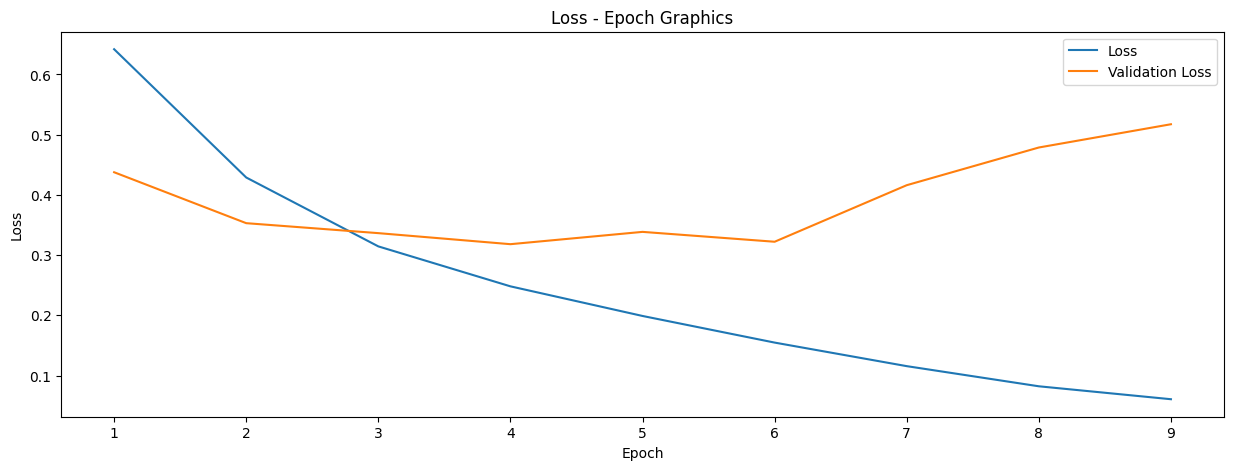

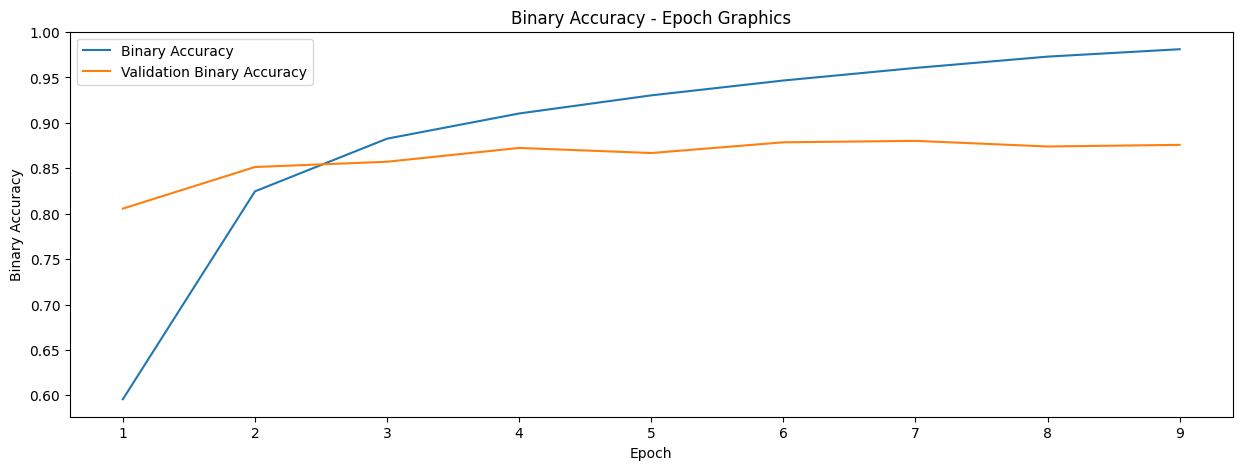

In [ ]:
import matplotlib.pyplot as plt

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()


figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Binary Accuracy - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Binary Accuracy')
plt.plot(range(1, len(hist.history['binary_accuracy']) + 1), hist.history['binary_accuracy'])
plt.plot(range(1, len(hist.history['val_binary_accuracy']) + 1), hist.history['val_binary_accuracy'])
plt.legend(['Binary Accuracy', 'Validation Binary Accuracy'])
plt.show()

In [ ]:
eval_result = model.evaluate(test_dataset_x, test_dataset_y)
for i in range(len(eval_result)):
 print(f'{model.metrics_names[i]} --> {eval_result[i]}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - binary_accuracy: 0.8594 - loss: 0.3266
loss --> 0.3321855366230011
compile_metrics --> 0.8581200242042542
